In [1]:
#!pip install requests-html
#!pip install bs4
#!pip install selenium
#!pip install textblob

In [2]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
reviewlist=[]

In [3]:
driver=webdriver.Chrome()
#install chrome drive(https://sites.google.com/a/chromium.org/chromedriver/home)

In [4]:
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews:', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
for i in range(1,10):
    url='https://www.amazon.in/Samsung-Galaxy-Raven-Black-Storage/product-reviews/B07HGH8D2R/ref=cm_cr_arp_d_paging_btm_prev_8?ie=UTF8&reviewerType=all_reviews&pageNumber={}'.format(i)
    driver.get(url)
    soup=BeautifulSoup(driver.page_source,'html.parser')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

In [6]:
data=pd.DataFrame(reviewlist)

In [7]:
data

,product,title,rating,body
0,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...",Value For Money !! Go for it,4.0,Update (15/08/2020):Never give a chance to reg...
1,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...",❤️❤️❤️❤️,5.0,As a title it is obviously a monsterAnd very v...
2,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...",Best Budget Phone In India,5.0,"Brilliant camera, huge battery life and brilli..."
3,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...",Feeling cheated,1.0,"Defective product received, it gets 8 to 12 ho..."
4,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...",Battery life is not upto mark,3.0,I am writing my review after using it for 6 da...
...,...,...,...,...
85,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...",Value for money with bad camera,3.0,Your browser does not support HTML5 video.\n\n...
86,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...",BEST MID RANGE SMARTPHONE ON THE PLANET EARTH,5.0,For those who are still using old Galaxy phone...
87,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...",Worst product from Samsung.. don't buy m21,3.0,I got Samsung M21 in 13999/- Comparing to thi...
88,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...","""NETWORK RELATED MAJOR ISSUE""",1.0,"19 July 2020, 1:45AM : This product has some ""..."


In [8]:
#lower casing
data['body']=data['body'].astype(str)
data['body']=data['body'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [9]:
# removing special characters
data['body']=data['body'].str.replace('^\w\s','')

In [10]:
#removing stopwords
stop=stopwords.words('english')
data['body']=data['body'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [11]:
#applying lemmatization
st = PorterStemmer()
data['body'] = data['body'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [12]:
def sentiment(x):
    return TextBlob(x).sentiment.polarity

data['polarity']=data['body'].apply(sentiment)

In [13]:
data

,product,title,rating,body,polarity
0,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...",Value For Money !! Go for it,4.0,updat (15/08/2020):never give chanc regret.. g...,0.285606
1,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...",❤️❤️❤️❤️,5.0,titl obvious monsterand good perform,0.350000
2,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...",Best Budget Phone In India,5.0,"brilliant camera, huge batteri life brilliant ...",0.518750
3,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...",Feeling cheated,1.0,"defect product received, get 8 12 hour charg a...",0.000000
4,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...",Battery life is not upto mark,3.0,write review use 6 days.i bought sumsung phone...,0.196875
...,...,...,...,...,...
85,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...",Value for money with bad camera,3.0,browser support html5 video. cours batteri dis...,0.138095
86,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...",BEST MID RANGE SMARTPHONE ON THE PLANET EARTH,5.0,"still use old galaxi phone like galaxi j2, thi...",0.158041
87,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...",Worst product from Samsung.. don't buy m21,3.0,got samsung m21 13999/- compar price rangepros...,0.163333
88,"Samsung Galaxy M21 (Raven Black, 4GB RAM, 64GB...","""NETWORK RELATED MAJOR ISSUE""",1.0,"19 juli 2020, 1:45am : product ""major network ...",0.253125


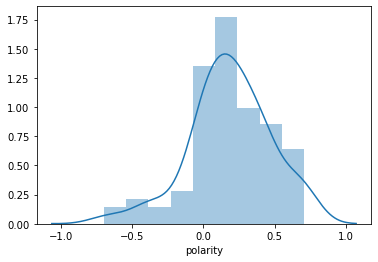

In [14]:
sns.distplot(data['polarity'])

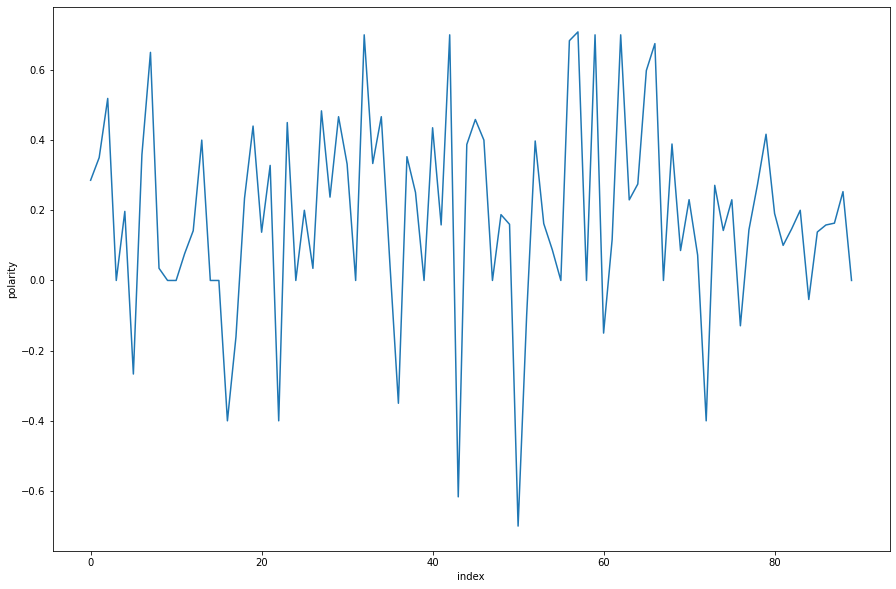

In [15]:
plt.figure(figsize=(15, 10))
data=data.reset_index()
sns.lineplot(y='polarity',x='index',data=data)

In [16]:
A=data['polarity'].copy()
A[data.polarity>0]=1
A[data.polarity<0]=-1
A[data.polarity==0]=0

In [17]:
data['sentiment']=A

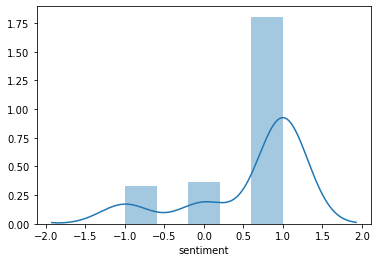

In [18]:
sns.distplot(data['sentiment'])